## `02_pandas2.ipynb`


### `Grouping`

In [21]:
import pandas as pd
import numpy as np

data = {
    '주문번호': [1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010],
    '고객ID': ['A', 'B', 'A', 'C', 'B', 'A', 'D', 'C', 'B', 'D'],
    '상품카테고리': ['전자제품', '의류', '가구', '전자제품', '의류', '식품', '가구', '식품', '전자제품', '의류'],
    '구매액': [150000, 75000, 220000, 95000, 82000, 45000, 180000, 35000, 120000, 62000],
    '배송지역': ['서울', '부산', '서울', '인천', '서울', '부산', '인천', '서울', '부산', '인천'],
    '할인률': [0.05, 0.1, 0, 0.2, 0.1, 0, 0.05, 0.15, 0.2, 0]
}

df = pd.DataFrame(data)


In [22]:
# 기본 그룹 - 고객별 구매액 총합
df.groupby('고객ID')['구매액'].sum()

# 그룹 객체
id_group = df.groupby('고객ID')

# 그룹확인 (고객 ID들 그룹)
id_group.groups.keys()

# 특정 그룹 데이터 확인
id_group.get_group('A')

# 여러 Col으로 그루핑 (Series)
multi_group = df.groupby(['고객ID', '상품카테고리'])['구매액'].sum()
# DF 변환
multi_group.to_frame()

# 1개 col(구매액)에 집계함수 여러개 적용
df.groupby('고객ID')['구매액'].agg(['sum', 'mean', 'count', 'min', 'max'])

# n개 col에 m개 집계함수
df.groupby('고객ID').agg({
    '구매액': ['sum', 'mean', 'count'],
    '할인률': ['mean', 'max']
})


# 사용자 정의 집계 함수
def discount_amount(price):
    return (price * df.loc[price.index, '할인률']).sum()

df.groupby('고객ID')['구매액'].agg([
    # AS, function
    ('총구매액', 'sum'),
    ('평균구매액', 'mean'),
    ('할인총액', discount_amount),
])



,총구매액,평균구매액,할인총액
고객ID,,,
A,415000,138333.333333,7500.0
B,277000,92333.333333,39700.0
C,130000,65000.000000,24250.0
D,242000,121000.000000,9000.0


In [8]:
# 집계 함수 응용
import pandas as pd
import numpy as np

# 샘플 데이터
df = pd.DataFrame({
    '상품ID': ['A001', 'A002', 'A001', 'A003', 'A002', 'A004', 'A003', 'A001', 'A002', 'A004'],
    '판매일자': pd.date_range('2023-01-01', periods=10),
    '판매수량': [5, 3, 7, 2, 4, 6, 3, 8, 5, 4],
    '판매금액': [50000, 30000, 70000, 25000, 40000, 65000, 30000, 80000, 50000, 45000],
    '반품수량': [0, 1, 0, 0, 0, 2, 1, 0, 0, 1],
    '고객평점': [4.5, 3.8, 4.2, 5.0, 4.0, 3.5, 4.2, 4.8, 3.9, 4.1]
})

In [7]:
# 기본 집계
df.groupby('상품ID').agg({
    '판매수량': ['sum', 'mean', 'count'],
    '판매금액': ['sum', 'mean'],
    '반품수량': ['sum'],
    '고객평점': ['mean']
})

df

,상품ID,판매일자,판매수량,판매금액,반품수량,고객평점
0,A001,2023-01-01,5,50000,0,4.5
1,A002,2023-01-02,3,30000,1,3.8
2,A001,2023-01-03,7,70000,0,4.2
3,A003,2023-01-04,2,25000,0,5.0
4,A002,2023-01-05,4,40000,0,4.0
5,A004,2023-01-06,6,65000,2,3.5
6,A003,2023-01-07,3,30000,1,4.2
7,A001,2023-01-08,8,80000,0,4.8
8,A002,2023-01-09,5,50000,0,3.9
9,A004,2023-01-10,4,45000,1,4.1


In [8]:
# 커스텀 함수
# 총 판매수량 대비 반품수량 비율
def return_rate(x):
    # print(x, type(x))
    total_sold = df.loc[x.index, '판매수량'].sum()
    total_returned = df.loc[x.index, '반품수량'].sum()
    return total_returned / total_sold if total_sold > 0 else 0

df.groupby('상품ID').agg({
    '판매수량': ['sum', 'count'],
    '반품수량': ['sum', return_rate],
})

판매수량       반품수량            
      sum count  sum return_rate
상품ID                            
A001   20     3    0    0.000000
A002   12     3    1    0.083333
A003    5     2    1    0.200000
A004   10     2    3    0.300000

In [9]:
# 그룹별 순위 및 누적 계산
import pandas as pd
import numpy as np

# 샘플 데이터: 부서별 직원 실적
data = {
    '직원ID': [101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112],
    '이름': ['김철수', '이영희', '박민수', '정지영', '최동민', '강준호', '윤서연', '임태혁', '한미래', '송지원', '오민지', '홍길동'],
    '부서': ['영업', '개발', '영업', '인사', '개발', '영업', '개발', '인사', '영업', '개발', '영업', '인사'],
    '월별실적': [120, 85, 95, 110, 75, 135, 95, 105, 115, 90, 125, 100],
    '고객평가': [4.5, 3.8, 4.2, 4.7, 3.9, 4.8, 4.1, 4.3, 4.5, 4.0, 4.6, 4.2]
}

df = pd.DataFrame(data)
print("부서별 직원 실적 데이터:")
print(df)

부서별 직원 실적 데이터:
    직원ID   이름  부서  월별실적  고객평가
0    101  김철수  영업   120   4.5
1    102  이영희  개발    85   3.8
2    103  박민수  영업    95   4.2
3    104  정지영  인사   110   4.7
4    105  최동민  개발    75   3.9
5    106  강준호  영업   135   4.8
6    107  윤서연  개발    95   4.1
7    108  임태혁  인사   105   4.3
8    109  한미래  영업   115   4.5
9    110  송지원  개발    90   4.0
10   111  오민지  영업   125   4.6
11   112  홍길동  인사   100   4.2


In [10]:
# 그룹 내 순위 계산
dept_group = df.groupby('부서')

# 부서별 월별 실적 랭킹(높은사람부터)
df['부서순위_실적'] = dept_group['월별실적'].rank(method='dense', ascending=False)

# 동일 순위가 있을 경우의 처리 방식
# rank_methods = ['average', 'min', 'max', 'dense', 'first']
# for method in rank_methods:
#     col_name = f'순위_{method}'
#     df[col_name] = df.groupby('부서')['월별실적'].rank(method=method, ascending=False)

# df

df

,직원ID,이름,부서,월별실적,고객평가,부서순위_실적
0,101,김철수,영업,120,4.5,3.0
1,102,이영희,개발,85,3.8,3.0
2,103,박민수,영업,95,4.2,5.0
3,104,정지영,인사,110,4.7,1.0
4,105,최동민,개발,75,3.9,4.0
5,106,강준호,영업,135,4.8,1.0
6,107,윤서연,개발,95,4.1,1.0
7,108,임태혁,인사,105,4.3,2.0
8,109,한미래,영업,115,4.5,4.0
9,110,송지원,개발,90,4.0,2.0


In [11]:
1 == 1.0

True

In [12]:
# 누적 합계 및 누적 통계
# 부서별 누적 실적 합계  -> acummulate cummulate

df['부서별누적합계'] = df.groupby('부서')['월별실적'].cumsum()
df['부서별누적최대'] = df.groupby('부서')['월별실적'].cummax()

# 그룹별 비율계산
# 부서별 총 실적 대비 개인 실적 비율
df['부서총실적'] = dept_group['월별실적'].transform('sum')
df['부서기여도'] = df['월별실적'] / df['부서총실적']

# 복합응용
# 성과점수는 = 0.7 실적 + 0.3 (평가*20)
df['성과점수'] = df['월별실적'] * 0.7 + df['고객평가'] * 0.3 * 20
# 성과점수 별 랭킹
df['부서순위_성과'] = dept_group['성과점수'].rank(method='dense', ascending=False)

def cal_bonus(row):
    # 10% 기본보너스
    base_bonus = row['월별실적'] * 0.1
    rank = row['부서순위_성과'] 
    if rank == 1:
        return base_bonus * 1.5
    elif rank == 2:
        return base_bonus * 1.3
    elif rank == 3:
        return base_bonus * 1.1
    else:
        return base_bonus

# 랭킹별 보너스 지급 함수
df['성과급'] = df.apply(cal_bonus, axis=1)
df

,직원ID,이름,부서,월별실적,고객평가,부서순위_실적,부서별누적합계,부서별누적최대,부서총실적,부서기여도,성과점수,부서순위_성과,성과급
0,101,김철수,영업,120,4.5,3.0,120,120,590,0.203390,111.0,3.0,13.20
1,102,이영희,개발,85,3.8,3.0,85,85,345,0.246377,82.3,3.0,9.35
2,103,박민수,영업,95,4.2,5.0,215,120,590,0.161017,91.7,5.0,9.50
3,104,정지영,인사,110,4.7,1.0,110,110,315,0.349206,105.2,1.0,16.50
4,105,최동민,개발,75,3.9,4.0,160,85,345,0.217391,75.9,4.0,7.50
5,106,강준호,영업,135,4.8,1.0,350,135,590,0.228814,123.3,1.0,20.25
6,107,윤서연,개발,95,4.1,1.0,255,95,345,0.275362,91.1,1.0,14.25
7,108,임태혁,인사,105,4.3,2.0,215,110,315,0.333333,99.3,2.0,13.65
8,109,한미래,영업,115,4.5,4.0,465,135,590,0.194915,107.5,4.0,11.50
9,110,송지원,개발,90,4.0,2.0,345,95,345,0.260870,87.0,2.0,11.70


In [23]:
# 실습: 매출 데이터 그룹별 분석
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 매출 데이터 생성
np.random.seed(42)

# 날짜 생성 (2023년 전체)
dates = pd.date_range('2023-01-01', '2023-12-31')
n_records = 500

data = {
    '주문ID': np.arange(1001, 1001 + n_records),
    '주문일자': np.random.choice(dates, n_records),
    '고객ID': np.random.choice([f'CUST{i:03d}' for i in range(1, 101)], n_records),
    '상품ID': np.random.choice([f'PROD{i:03d}' for i in range(1, 51)], n_records),
    '카테고리': np.random.choice(['전자제품', '의류', '가구', '식품', '화장품', '도서', '스포츠'], n_records),
    '매출액': np.random.randint(10000, 500000, n_records),
    '수량': np.random.randint(1, 10, n_records),
    '지역': np.random.choice(['서울', '부산', '인천', '대구', '광주', '대전', '울산', '경기', '강원'], n_records),
    '결제방법': np.random.choice(['신용카드', '현금', '체크카드', '휴대폰', '계좌이체'], n_records),
    '고객등급': np.random.choice(['일반', '실버', '골드', 'VIP'], n_records)
}

df = pd.DataFrame(data)
df.to_csv('sales_data_실습.csv', index=False, encoding='utf-8-sig')

In [3]:
df.head(3)

,주문ID,주문일자,고객ID,상품ID,카테고리,매출액,수량,지역,결제방법,고객등급
0,1001,2023-04-13,CUST002,PROD011,식품,384899,4,대구,현금,골드
1,1002,2023-12-15,CUST092,PROD004,도서,66985,7,대전,체크카드,VIP
2,1003,2023-09-28,CUST032,PROD015,가구,322213,9,강원,체크카드,일반


In [ ]:
# 검색후 하기

# 날짜 정보 추출 -> 컬럼 추가 ['주문년월', '요일', '주']
df['주문일자'] = pd.to_datetime(df['주문일자'])
df['주문년월'] = df['주문일자'].dt.to_period('M').astype(str)
weekday_map = {0: '월', 1: '화', 2: '수', 3: '목', 4: '금', 5: '토', 6: '일'}
df['요일'] = df['주문일자'].dt.weekday.map(weekday_map)
df['주'] = df['주문일자'].dt.isocalendar().week
df[['주문일자', '주문년월', '요일', '주']].head(10)


,주문일자,주문년월,요일,주
0,2023-04-13,2023-04,목,15
1,2023-12-15,2023-12,금,50
2,2023-09-28,2023-09,목,39
3,2023-04-17,2023-04,월,16
4,2023-03-13,2023-03,월,11
5,2023-07-08,2023-07,토,27
6,2023-01-21,2023-01,토,3
7,2023-04-13,2023-04,목,15
8,2023-05-02,2023-05,화,18
9,2023-08-03,2023-08,목,31


In [32]:
# 단가 계산 
df['단가'] = df['매출액'] / df['수량']
# 단가 컬럼 추가 (매출액/수량)
df = df[df['수량'] != 0]  # 수량이 0이 아닌 경우만 계산
df['단가'] = df['매출액'] / df['수량']
df['단가'] = df.apply(lambda row: row['매출액'] / row['수량'] if row['수량'] != 0 else np.nan, axis=1)  # 만약 수량이 0인 경우도 남길 때
df[['단가']].head(10)

,단가
0,96224.750000
1,9569.285714
2,35801.444444
3,162235.000000
4,39579.000000
5,55533.250000
6,164470.000000
7,34209.285714
8,30430.500000
9,69608.200000


In [38]:
# 카테고리별 매출 분석 
# 매출액 총합,평균,개수 /  수량 총합
 # 카테고리별 총 매출 합
category_sales = df.groupby('카테고리')['매출액'].sum().sort_values(ascending=False)
print(category_sales)
 # 카테고리별 총 매출 평균
category_avg = df.groupby('카테고리')['매출액'].mean().sort_values(ascending=False)
print(category_avg)
 # 카테고리별 총 개수
category_quantity = df.groupby('카테고리')['수량'].sum().sort_values(ascending=False)
print(category_quantity)
# 전체 총 수량 합
total_quantity = df['수량'].sum()
print(f"전체 수량 총합: {total_quantity}")
 

카테고리
화장품     20600588
전자제품    19526279
가구      19263561
의류      17971859
도서      17826814
스포츠     17729088
식품      16816186
Name: 매출액, dtype: int32
카테고리
스포츠     268622.545455
가구      267549.458333
화장품     260766.936709
전자제품    256924.723684
식품      254790.696970
도서      254668.771429
의류      253124.774648
Name: 매출액, dtype: float64
카테고리
화장품     386
도서      374
의류      359
전자제품    358
가구      348
스포츠     332
식품      299
Name: 수량, dtype: int32
전체 수량 총합: 2456


주문년월
2023-01     7786750
2023-02    13558838
2023-03     4820044
2023-04    13329098
2023-05    12825903
2023-06    10302473
2023-07    11575996
2023-08    11604378
2023-09    11646019
2023-10    10932657
2023-11     9335449
2023-12    12016770
Name: 매출액, dtype: int32


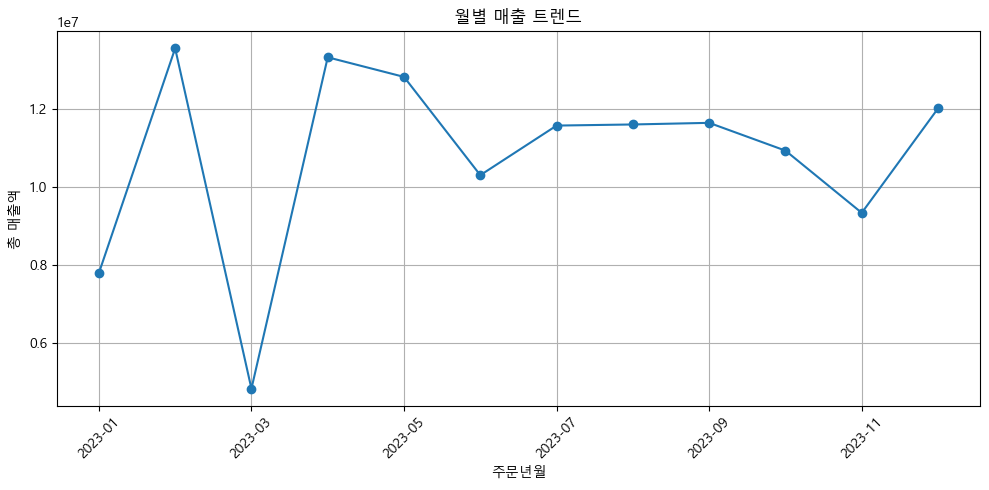

             총매출액  주문건수           평균단가
주문년월                                  
2023-01   7786750    31   68573.324552
2023-02  13558838    47   83141.030344
2023-03   4820044    23   67224.537095
2023-04  13329098    49   97647.609208
2023-05  12825903    51   88883.442134
2023-06  10302473    44   64922.530177
2023-07  11575996    37  107918.450397
2023-08  11604378    47   69333.936651
2023-09  11646019    45   76389.962522
2023-10  10932657    43   72844.864636
2023-11   9335449    38   76846.463711
2023-12  12016770    45   82730.368333


In [ ]:
# 월별 매출 트렌드
monthly_sales = df.groupby('주문년월')['매출액'].sum().sort_index()
print(monthly_sales)
 # 월별 매출 트랜드 꺽은선 그래프
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
monthly_sales.plot(marker='o')
plt.title('월별 매출 트렌드')
plt.xlabel('주문년월')
plt.ylabel('총 매출액')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# '주문년월' 컬럼으로 매출액 sum, 주문ID count, 단가 mean
monthly_summary = df.groupby('주문년월').agg({
    '매출액': 'sum',
    '주문ID': 'count',
    '단가': 'mean'
}).rename(columns={
    '매출액': '총매출액',
    '주문ID': '주문건수',
    '단가': '평균단가'
})
print(monthly_summary)

# matplotlib에 한글 폰트 설정
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font', family='Malgun Gothic')
mpl.rcParams['axes.unicode_minus'] = False


In [50]:
# 지역 & 카테고리별 매출 분석
region_category_sales = df.groupby(['지역', '카테고리'])['매출액'].sum().unstack().fillna(0)
print(region_category_sales)

카테고리       가구       도서      스포츠       식품       의류     전자제품      화장품
지역                                                                 
강원    2567149  2229004  3236879  1546551  1961318  3064388  2350914
경기    1845589  1547956  2396558  2700479  3636189  2385742  3001775
광주    2583543  3290899  1543411  2609787  2337267  1158681  1920285
대구    2068333  1395664  1997663  1527438  2030142  2824580  2990911
대전    2806642  1400616  1817291  2557407  1321115  1665455  2186323
부산    1598356  1128322  1256823   749149  1827427  1714636  2565236
서울    2302258  2822680  2305854  1513749  2568012  1945582  1193348
울산    1396916  2365056  1497102  1385252   228601  1897187  2025993
인천    2094775  1646617  1677507  2226374  2061788  2870028  2365803


고객등급      VIP       골드       실버       일반
요일                                      
월     6182434  3402384  4532290  7265467
화     4955018  5357448  4777296  4184996
수     3323716  4295608  3749879  3383430
목     5066444  5601373  4273034  6456148
금     2998646  5563601  4584163  4059550
토     4298206  4124191  5460233  4178794
일     4838696  3240409  4501861  5079060


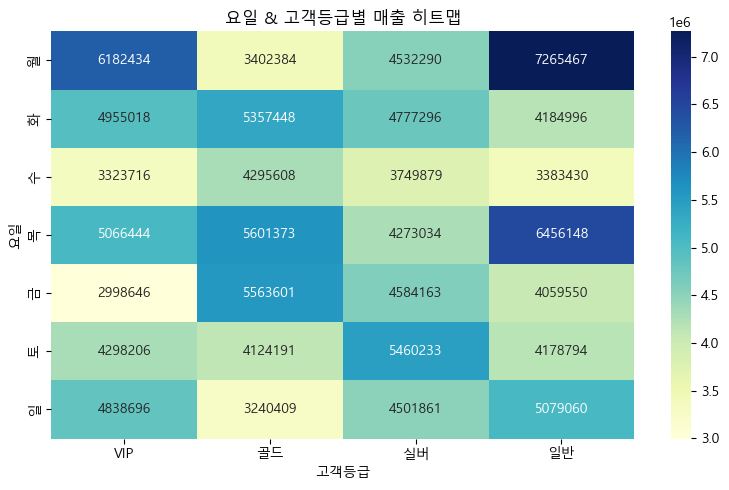

In [52]:
# 요일별 고객 등급별 매출 패턴
pattern = pd.pivot_table(df,
                         index='요일',
                         columns='고객등급',
                         values='매출액',
                         aggfunc='sum').fillna(0)

# 요일 정렬 (기본은 가나다순이므로 수동 정렬)
ordered_days = ['월', '화', '수', '목', '금', '토', '일']
pattern = pattern.reindex(ordered_days)
print(pattern)

 # 요일별 고객 등급별 매출 패턴의 히트맵
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.heatmap(pattern, annot=True, fmt=".0f", cmap='YlGnBu')
plt.title('요일 & 고객등급별 매출 히트맵')
plt.xlabel('고객등급')
plt.ylabel('요일')
plt.tight_layout()
plt.show()

In [53]:
# 결제방법별 분석 및 고객 행동 (매출액-sum mean count, 단가-mean)
payment_summary = df.groupby('결제방법').agg({
    '매출액': ['sum', 'mean', 'count'],
    '단가': 'mean'
})
payment_summary.columns = ['총매출액', '평균매출액', '주문건수', '평균단가']
payment_summary = payment_summary.sort_values('총매출액', ascending=False)

print(payment_summary)

          총매출액          평균매출액  주문건수          평균단가
결제방법                                             
체크카드  26536652  260163.254902   102  66063.697837
계좌이체  26376866  251208.247619   105  81029.835393
휴대폰   25727084  254723.603960   101  84024.975216
현금    25579043  272117.478723    94  81782.442815
신용카드  25514730  260354.387755    98  89773.784973


In [54]:
# 고객id 별 구매 패턴 (매출액 sum mean count, 상품 고유, 카테고리 고유)
customer_summary = df.groupby('고객ID').agg({
    '매출액': ['sum', 'mean', 'count'],
    '상품ID': pd.Series.nunique,
    '카테고리': pd.Series.nunique
})

customer_summary.columns = ['총매출액', '평균매출액', '구매건수', '고유상품수', '고유카테고리수']  # 컬럼 이름 정리
customer_summary = customer_summary.sort_values('총매출액', ascending=False)  # 매출액 기준 내림차순 정렬 (선택)

print(customer_summary.head())

            총매출액          평균매출액  구매건수  고유상품수  고유카테고리수
고객ID                                                 
CUST092  2814587  255871.545455    11     11        5
CUST017  2814138  281413.800000    10     10        6
CUST005  2709222  338652.750000     8      8        5
CUST026  2318957  331279.571429     7      7        4
CUST023  2187607  312515.285714     7      7        5


주
1    1693663
2    1796630
3    1796731
4    2232358
5    2203467
Name: 매출액, dtype: int32


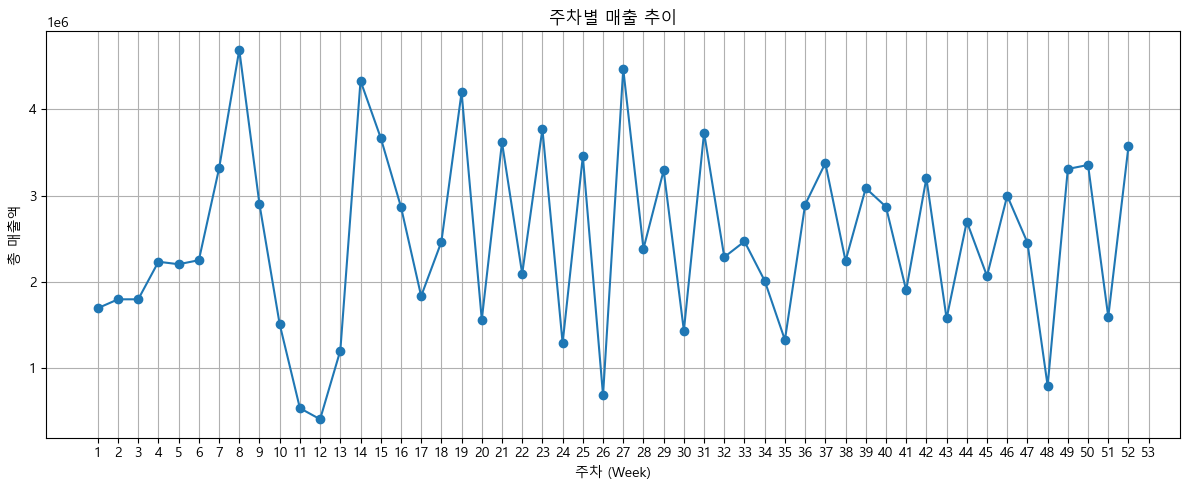

In [ ]:
# 주별 매출 추이
weekly_sales = df.groupby('주')['매출액'].sum().sort_index()
print(weekly_sales.head())
 # 시각화 (꺽은선 그래프)
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
weekly_sales.plot(marker='o')
plt.title('주차별 매출 추이')
plt.xlabel('주차 (Week)')
plt.ylabel('총 매출액')
plt.grid(True)
plt.xticks(range(1, 54))  # 1~53 주차 기준
plt.tight_layout()
plt.show()

상품ID
PROD040    4878382
PROD029    4260616
PROD038    3825127
PROD047    3793126
PROD009    3737512
PROD033    3645223
PROD010    3625484
PROD017    3608202
PROD036    3543357
PROD026    3516412
Name: 매출액, dtype: int32


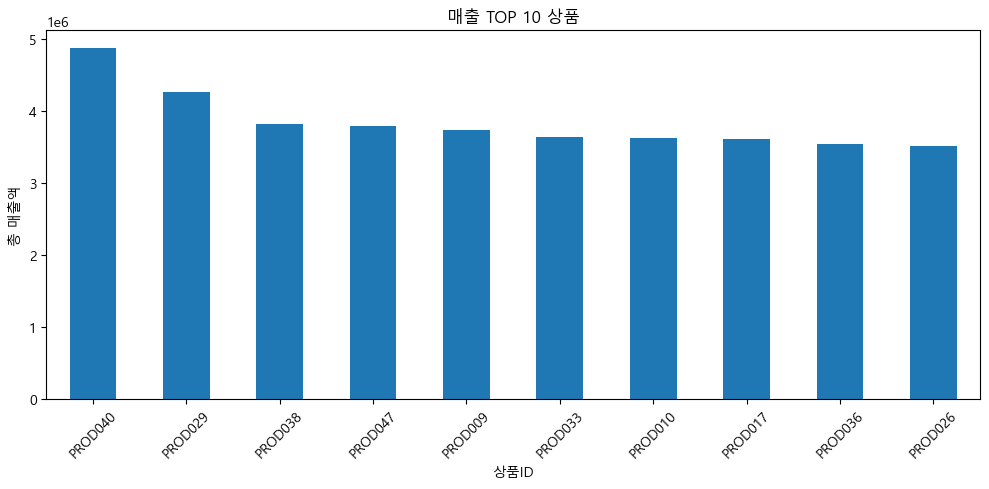

In [65]:
# 매출 TOP 10 상품
top10_products = df.groupby('상품ID')['매출액'].sum().sort_values(ascending=False).head(10)
print(top10_products)
 # 시각화
import matplotlib.pyplot as plt

top10_products.plot(kind='bar', figsize=(10, 5))
plt.title('매출 TOP 10 상품')
plt.xlabel('상품ID')
plt.ylabel('총 매출액')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

       상품ID  카테고리     총매출액
39  PROD040  전자제품  4878382
28  PROD029    가구  4260616
37  PROD038   스포츠  3825127
46  PROD047   화장품  3793126
8   PROD009   스포츠  3737512
32  PROD033    가구  3645223
9   PROD010   스포츠  3625484
16  PROD017    가구  3608202
35  PROD036   스포츠  3543357
25  PROD026   화장품  3516412


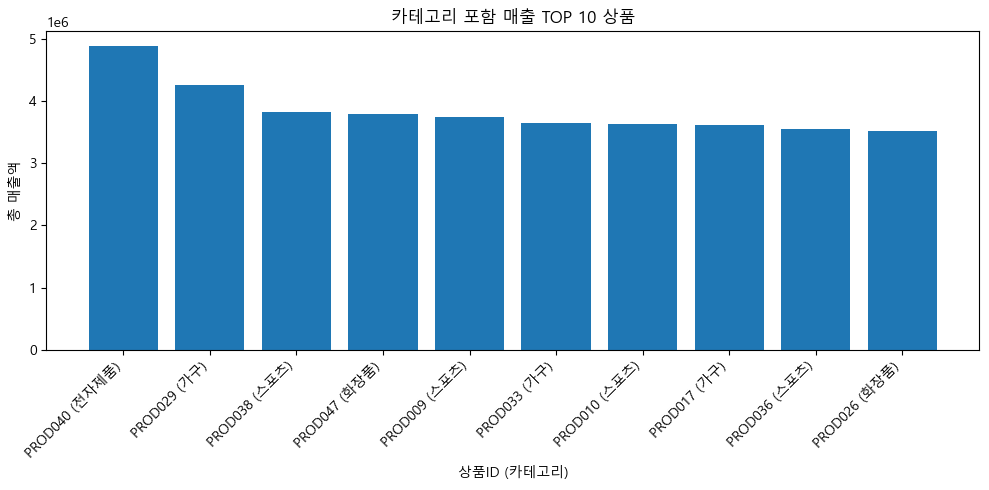

In [63]:
# 1. 상품ID + 카테고리 기준 매출액 합계
product_category_sales = df.groupby(['상품ID', '카테고리'])['매출액'].sum().reset_index()

# 2. 상품ID 기준으로 가장 매출이 높은 카테고리만 남기기 (상품별 대표 카테고리)
product_top_category = product_category_sales.sort_values(['상품ID', '매출액'], ascending=[True, False])
product_top_category = product_top_category.drop_duplicates(subset='상품ID', keep='first')

# 3. 상품ID 기준 전체 매출액 합계 계산
product_total_sales = df.groupby('상품ID')['매출액'].sum().reset_index()
product_total_sales.columns = ['상품ID', '총매출액']

# 4. 대표 카테고리와 총매출액 merge
product_top10 = pd.merge(product_total_sales, product_top_category, on='상품ID')

# 5. 총매출액 기준 상위 10개 추출
product_top10 = product_top10.sort_values('총매출액', ascending=False).head(10)

# 최종 정리된 컬럼 보기
print(product_top10[['상품ID', '카테고리', '총매출액']])

import matplotlib.pyplot as plt

# X축 라벨: "상품ID (카테고리)" 형태로 조합
product_top10['상품_카테고리'] = product_top10['상품ID'] + ' (' + product_top10['카테고리'] + ')'

# 막대 그래프 그리기
plt.figure(figsize=(10, 5))
plt.bar(product_top10['상품_카테고리'], product_top10['총매출액'])

plt.title('카테고리 포함 매출 TOP 10 상품')
plt.xlabel('상품ID (카테고리)')
plt.ylabel('총 매출액')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## `데이터 결합`
1. 데이터 단순 결합(행 결합)
2. 데이터 병합
3. Index 기준 Join

In [68]:
# 데이터 결합 기초 (concat) - 행결합 (Col 똑같아야 함)

# 샘플 데이터 생성
# 첫 번째 데이터프레임: 1월 판매 데이터
df1 = pd.DataFrame({
    '상품ID': ['A001', 'A002', 'A003', 'A004', 'A005'],
    '상품명': ['노트북', '스마트폰', '태블릿', '헤드폰', '스피커'],
    '판매량_1월': [10, 20, 15, 30, 25]
})

# 두 번째 데이터프레임: 2월 판매 데이터
df2 = pd.DataFrame({
    '상품ID': ['A001', 'A003', 'A005', 'A006', 'A007'],
    '상품명': ['노트북', '태블릿', '스피커', '마우스', '키보드'],
    '판매량_2월': [12, 18, 23, 15, 19]
})

# 기본 concat - 행 결합 -> 안맞는 컬럼은 NaN
pd.concat([df1, df2])

# 인덱스 초기화 (겹치는 인덱스 없이 처음부터 다시)
pd.concat([df1, df2], ignore_index=True)

# 열 방향 결합
pd.concat([df1, df2], axis=1)

# join inner (공통 열만 유지)
pd.concat([df1, df2], join='inner')


,상품ID,상품명
0,A001,노트북
1,A002,스마트폰
2,A003,태블릿
3,A004,헤드폰
4,A005,스피커
0,A001,노트북
1,A003,태블릿
2,A005,스피커
3,A006,마우스
4,A007,키보드


In [69]:
# 데이터 병합 (merge)

products = pd.DataFrame({
    '상품ID': ['P001', 'P002', 'P003', 'P004', 'P005'],
    '상품명': ['노트북', '스마트폰', '태블릿', '헤드폰', '스피커'],
    '가격': [1200000, 850000, 500000, 150000, 75000],
    '카테고리': ['컴퓨터', '모바일', '모바일', '음향기기', '음향기기']
})

orders = pd.DataFrame({
    '주문번호': [1001, 1002, 1003, 1004, 1005, 1006],
    '고객ID': ['C001', 'C002', 'C003', 'C001', 'C004', 'C002'],
    '상품ID': ['P001', 'P002', 'P003', 'P002', 'P005', 'P006'],
    '수량': [1, 2, 1, 1, 3, 2],
    '주문일자': ['2023-01-05', '2023-01-10', '2023-01-15', '2023-01-20', '2023-01-25', '2023-01-30']
})


print(products)
print(orders)
# 기본 병합 (Inner Join)
pd.merge(orders, products, on='상품ID')

# Outer Join
pd.merge(orders, products, on='상품ID', how='outer')

# Left Join
pd.merge(orders, products, on='상품ID', how='left')

# Right Join
pd.merge(orders, products, on='상품ID', how='right')

   상품ID   상품명       가격  카테고리
0  P001   노트북  1200000   컴퓨터
1  P002  스마트폰   850000   모바일
2  P003   태블릿   500000   모바일
3  P004   헤드폰   150000  음향기기
4  P005   스피커    75000  음향기기
   주문번호  고객ID  상품ID  수량        주문일자
0  1001  C001  P001   1  2023-01-05
1  1002  C002  P002   2  2023-01-10
2  1003  C003  P003   1  2023-01-15
3  1004  C001  P002   1  2023-01-20
4  1005  C004  P005   3  2023-01-25
5  1006  C002  P006   2  2023-01-30


,주문번호,고객ID,상품ID,수량,주문일자,상품명,가격,카테고리
0,1001.0,C001,P001,1.0,2023-01-05,노트북,1200000,컴퓨터
1,1002.0,C002,P002,2.0,2023-01-10,스마트폰,850000,모바일
2,1004.0,C001,P002,1.0,2023-01-20,스마트폰,850000,모바일
3,1003.0,C003,P003,1.0,2023-01-15,태블릿,500000,모바일
4,NaN,NaN,P004,NaN,NaN,헤드폰,150000,음향기기
5,1005.0,C004,P005,3.0,2023-01-25,스피커,75000,음향기기


In [70]:
customers = pd.DataFrame({
    'ID': ['C001', 'C002', 'C003', 'C004', 'C005'],
    '이름': ['김철수', '이영희', '박민수', '정지영', '최동민'],
    '등급': ['VIP', '골드', '실버', '골드', '브론즈']
})

# 열 이름이 다르면?
pd.merge(
    orders, 
    customers, 
    left_on='고객ID',  # orders 데이터프레임의 열 이름
    right_on='ID',    # customers 데이터프레임의 열 이름
    how='inner'
)

,주문번호,고객ID,상품ID,수량,주문일자,ID,이름,등급
0,1001,C001,P001,1,2023-01-05,C001,김철수,VIP
1,1002,C002,P002,2,2023-01-10,C002,이영희,골드
2,1003,C003,P003,1,2023-01-15,C003,박민수,실버
3,1004,C001,P002,1,2023-01-20,C001,김철수,VIP
4,1005,C004,P005,3,2023-01-25,C004,정지영,골드
5,1006,C002,P006,2,2023-01-30,C002,이영희,골드


In [77]:
# 샘플 데이터셋 생성
# 1. 고객 정보 데이터
customers = pd.DataFrame({
    '고객ID': [f'CUST{i:03d}' for i in range(1, 11)],
    '이름': ['김철수', '이영희', '박민수', '정지영', '최동민', '강준호', '윤서연', '임태혁', '한미래', '송지원'],
    '성별': ['남', '여', '남', '여', '남', '남', '여', '남', '여', '여'],
    '연령대': ['30대', '20대', '40대', '30대', '50대', '20대', '40대', '30대', '20대', '50대'],
    '가입일자': pd.date_range('2023-01-01', periods=10, freq='3D'),
    '지역': ['서울', '부산', '서울', '인천', '대구', '서울', '부산', '인천', '서울', '대구']
})

# 2. 주문 정보 데이터
np.random.seed(42)
n_orders = 50

orders = pd.DataFrame({
    '주문번호': [f'ORD{i:04d}' for i in range(1, n_orders+1)],
    '고객ID': np.random.choice(customers['고객ID'], n_orders),
    '주문일자': pd.date_range('2023-01-05', periods=n_orders, freq='2D'),
    '결제방법': np.random.choice(['신용카드', '체크카드', '계좌이체', '간편결제'], n_orders),
    '배송상태': np.random.choice(['배송완료', '배송중', '주문확인', '배송지연'], n_orders, p=[0.7, 0.15, 0.1, 0.05])
})

# 3. 주문 상세 정보 데이터
n_details = 80
products = ['노트북', '스마트폰', '태블릿', '헤드폰', '스피커', '키보드', '마우스', '모니터']
categories = ['전자제품', '컴퓨터', '주변기기', '음향기기']

order_details = pd.DataFrame({
    '상세번호': [f'ITEM{i:04d}' for i in range(1, n_details+1)],
    '주문번호': np.random.choice(orders['주문번호'], n_details),
    '상품명': np.random.choice(products, n_details),
    '카테고리': np.random.choice(categories, n_details),
    '수량': np.random.randint(1, 5, n_details),
    '가격': np.random.choice([50000, 100000, 150000, 800000, 1200000, 1500000], n_details),
    '할인율': np.random.choice([0, 0.1, 0.2, 0.3], n_details)
})

# 4. 배송 정보 데이터
shipping = pd.DataFrame({
    '주문번호': orders['주문번호'].unique(),
    '배송사': np.random.choice(['A택배', 'B물류', 'C익스프레스'], len(orders['주문번호'].unique())),
    '배송비': np.random.choice([0, 2500, 5000], len(orders['주문번호'].unique())),
    '출고일자': pd.date_range('2023-01-06', periods=len(orders['주문번호'].unique()), freq='2D')
})

# 5. 고객 만족도 데이터 (일부 주문에 대해서만)
satisfaction_orders = np.random.choice(orders['주문번호'], size=30, replace=False)
satisfaction = pd.DataFrame({
    '주문번호': satisfaction_orders,
    '만족도': np.random.randint(1, 6, 30),
    '리뷰': np.random.choice(['긍정', '중립', '부정'], 30, p=[0.6, 0.3, 0.1]),
    '리뷰일자': pd.date_range('2023-01-15', periods=30, freq='3D')
})

# 위 생성 데이터 CSV 파일로 생성 코드
merged = pd.merge(orders, order_details, on='주문번호', how='left')  # 1. 주문 + 주문상세
merged = pd.merge(merged, shipping, on='주문번호', how='left')  # 2. + 배송정보
merged = pd.merge(merged, satisfaction, on='주문번호', how='left')  # 3. + 고객만족도
merged = pd.merge(merged, customers, on='고객ID', how='left')  # 4. + 고객정보 (고객ID 기준)
merged.to_csv('Sample_data.csv', index=False, encoding='utf-8-sig')  # 5. 저장

In [87]:
df.columns = df.columns.str.strip()  # 컬럼 공백 제거

# 주문번호별 배송상태 개수 세기
배송상태_중복 = df.groupby('주문번호')['배송상태'].nunique()

# 배송상태가 여러 개인 주문번호만 추출
다중배송상태 = 배송상태_중복[배송상태_중복 > 1]

# 결과 출력
print(다중배송상태)   

Series([], Name: 배송상태, dtype: int64)


배송상태    배송완료  배송중  배송지연  주문확인
배송사                          
A택배       29   10     4     8
B물류        9    3     0     0
C익스프레스    22    7     0     1


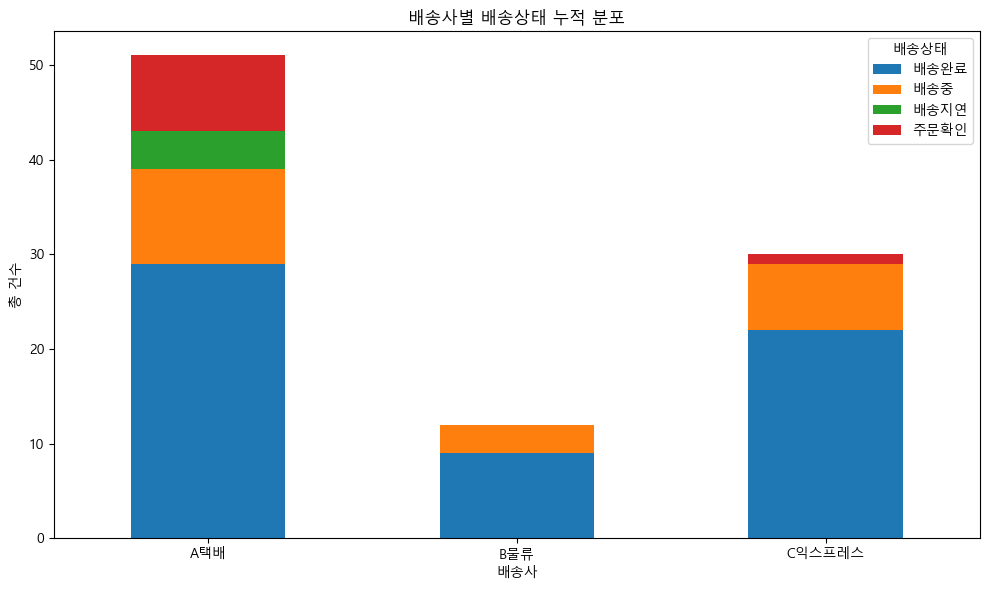

In [ ]:
# 배송사 별 배송상태
배송_피벗 = df.pivot_table(index='배송사', columns='배송상태', aggfunc='size', fill_value=0)
print(배송_피벗)
 # 배송사 별 배송상태 시각화(누적 막대그래프)
배송_피벗.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('배송사별 배송상태 누적 분포')
plt.xlabel('배송사')
plt.ylabel('총 건수')
plt.xticks(rotation=0)
plt.legend(title='배송상태')
plt.tight_layout()
plt.show()